# Maximum Likelihood Estimation for Gaussian Mixture Models

The PDF of a GMM is defined by:

$p(x) = \sum_{j=1}^M p(x \mid \mu_j, \sigma_j) \pi_j$

where $\pi_j$ are the mixture coefficients, $M$ is the number of Gaussians and $p(x \mid \mu_j, \sigma_j)$ is the PDF of the $j-th$ Gaussian.

Since the $\pi_j$s are probabilities, $\sum_j \pi_j = 1$.

# Univariate Gaussians with Known Mixture Coefficients

To begin with, let us assume that the mixture coefficents are known, so the problem is to find the values of the $(\mu_j, \sigma_j)$  that maximizes the likelihood of the entire dataset.

The log-likelihood of a single instance $x_i$ is
    
$LL(x_i) = \ln p(x_i) = \sum_j \ln \big[\pi_j p(x_i \mid \mu_j, \sigma_j) \big] = \sum_j \big [\ln (\pi_j) + \ln p(x_i \mid \mu_j, \sigma_j) \big ]$

Now, we know: $p(x_i \mid \mu_j, \sigma_j) = \frac {1} {\sqrt(2 \pi) \sigma_j} \exp \big[ -\frac {(x_i - \mu_j)^2} {2 \sigma_j^2} \big ]$


Hence, $\ln p(x_i \mid \mu_j, \sigma_j) = - \big [\frac {(x_i - \mu_j)^2} {2 \sigma_j^2}  + \frac {1} {2} \ln (2 \pi) + \ln (\sigma_j) \big ]$

Hence, $LL(x_i) = \sum_j \big [ ln (\pi_j) - \frac {(x_i - \mu_j)^2} {2 \sigma_j^2}  - \frac {1}{2} \ln (2 \pi) - \ln (\sigma_j) \big ] = \sum_j \big [ ln (\pi_j) - \frac {1}{2} \ln (2 \pi)) \big ] - \sum_j \big [\frac {(x_i - \mu_j)^2} {2 \sigma_j^2} +  \ln (\sigma_j)  \big ]$

The log-likelihood of the entire dataset $D$ is:

$LL(D) = \sum_i LL(x_i)$

To find the values of $(\mu_j, \sigma_j)$ that maximize the likelihood of the entire dataset, we take the derivative of $LL(D)$ w.r.t. some $\mu_k$ and $\sigma_k$ and set them to zero.

# Maximizing Log-likelihood

## Finding $\mu_k$

$\frac {\partial} {\partial \mu_k} [ LL(x_i) ] = - \frac {2(x_i - \mu_k)(-1)} {2 \sigma_k^2} = \frac {(x_i - \mu_k)} {\sigma_k^2}$. The sum contributes only one term to the derivative where $\mu_j = \mu_k$, the derivative of all the other terms are zero.

Hence, $\frac {\partial} {\partial \mu_k} [LL(D)] = \frac {1}{\sigma_k^2} \sum_i (x_i - \mu_k)$

Setting this to zero, we get:

$\sum_i (x_i - \mu_k) = 0 => n \mu_k = \sum_i x_i => \mu_k = \frac {1}{n} x_i$ 

## Finding $\sigma_k$

$\frac {\partial} {\partial \sigma_k} [LL(x_i)] = - \big [ \frac {(-2) (x_i - \mu_k)^2} {2 \sigma_k^3} + \frac {1} {\sigma_k} \big ] = \big [ \frac {(x_i - \mu_k)^2} {\sigma_k^3} - \frac {1}{\sigma_k} \big ]$ 

As before, $\frac {\partial} {\partial \sigma_k} [LL(D)] = \sum_i \big [ \frac {(x_i - \mu_k)^2} {\sigma_k^3} - \frac {1}{\sigma_k} \big ]$

Setting this to zero, we get:
    
$\frac {\sum_i (x_i - \mu_k)^2} {\sigma_k^3} = \frac {n} {\sigma_k} => \sigma_k^2 = \frac {1}{n} (x_i - \mu_k)^2$

Replacing $\mu_k = \bar{x}$, we get:
 
$\sigma_k^2 = \frac {1}{n} (x_i - \bar{x}) = \sigma_x^2$

Thus when the mixture coefficents are known, the MLE estimates of the Gaussian params are the mean and stddev of the input samples.

# Univariate Gaussians with Unknown Mixture

In practice, we don't know what the mixture coefficients are. This leads to a more complex optimization problem since the $\pi_j$ term in the expression for $LL(x_i)$ cannot be treated as constants. In addition, we now have a constrained optimization problem with $\sum_j \pi_j = 1$. There is no closed form solution for this problem.

# Using Expectation Maximization

Instead of solving the complex optimization problem, we can use the EM algorithm, which allows us to pretend as if we know the mixture coefficients and thus apply the simpler MLE solution iteratively.

In the EM approach, we initialize the Gaussian parameters and the mixture coefficients randomly. Then,

## Expection Step

We can think of the $\pi_j$s as prior probabilities for each mixture. Using Bayes' theroem, we can calculate the posteriors as

$\gamma_{ij} = p(\mu_j, \sigma_j | x_i) = \frac {p(x_i \mid \mu_j, \sigma_j) \pi_j} {p(x_i)}$

Where $p(x_i)$ = $\sum_t p(x_i \mid \mu_t, \sigma_t) \pi_t$ is the GMM PDF.

For each mixture $j$, calcute the responsilbilities:

$\gamma_j = \sum_i \gamma_{ij} = \frac {\pi_j} {p(x_i)} \sum_i p(x_i | \mu_i, \sigma_j)$

## Maximization Step

Update the $\pi_j$s as:
$\pi_j = \frac {1}{n} \sum_i \gamma_{ij}$

Update the $j-th$ Gaussian parameters as:

$\mu_j = \frac {\sum_i \gamma_{ij}x_i} {\sum_i \gamma_{ij}}$

And 

$\sigma_j^2 =  \frac {\sum_i \gamma_{ij}(x_i - \mu_j)^2} {\sum_i \gamma_{ij}}$

# Example

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.stats import norm

x1 = norm.rvs(size=50, loc=1, scale=0.5)
x2 = norm.rvs(size=50, loc=5, scale=0.8)

x = np.hstack([x1, x2])
data = pd.Series(x)

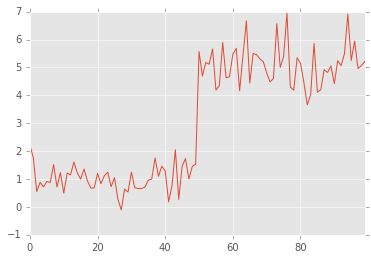

In [3]:
data.plot()

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm

from ipywidgets import FloatProgress
from IPython.display import display


def update_params(resp, g_params, x):
    """Return the updated Gaussian params using the responsibilities."""

    # series with 1 row per Gaussian
    resp_sum = resp.sum(axis=0)
    means = resp.mul(x, axis=0).sum(axis=0) / resp_sum

    old_means = g_params['mu']

    t = pd.DataFrame(np.nan, index=x.index, columns=g_params.index)

    for i, x_i in x.iteritems():
        v = (old_means - x_i).pow(2)
        t.loc[i, :] = resp.loc[i].mul(v)

    new_vars = t.sum(axis=0) / resp_sum
    results = pd.concat([means, new_vars], keys=g_params.columns, axis=1)
    results.loc[:, 'sigma'] = np.sqrt(results['sigma'])

    return results


def update_responsibilities(g_params, priors, x, normalized=True):
    """Returns a dataframe with shape (n_samples * n_mixtures). 
    Cell_{ij} contains p(x_i | \mu_j, \sigma_j) * pi_j / p(x_i).
    """
    t = x.apply(lambda x_i: gmm_pdf(g_params, x_i))
    u = t.mul(priors, axis=1)
    
    if normalized:
        resp = u.div(u.sum(axis=1), axis=0)
    else:
        resp = u
        
    return resp


def gmm_pdf(g_params, x_i):
    """Returns the gaussian PDFs for i-th input. Note that this is not multiplied by the prior."""
    result = g_params.apply(lambda row: norm.pdf(x_i, loc=row['mu'], scale=row['sigma']), axis=1)
    return result


def update_priors(resp):
    """Calculates the new priors from the responsibilities."""
    new_priors = resp.mean(axis=0)

    # Make a probability distribution
    new_priors /= new_priors.sum()
    return new_priors


def fit_gaussian_mixtures(n_mixtures, x, n_iters=10):
    assert n_mixtures > 1
    assert n_iters >= 1

    progress = FloatProgress(min=0, max=n_iters)
    display(progress)
    
    # initialization - priors
    priors = pd.Series(np.random.rand(n_mixtures))
    
    # initialization - params for the univariate gaussians
    g_params = pd.DataFrame(np.random.rand(n_mixtures, 2), columns=['mu', 'sigma'])

    for i in range(1, n_iters + 1):
        resp = update_responsibilities(g_params, priors, x)
        new_priors = update_priors(resp)

        # check that the new priors still make a probability distribution
        assert np.abs(new_priors.sum() - 1.0) < 1E-5

        new_g_params = update_params(resp, g_params, x)

        priors = new_priors
        g_params = new_g_params
        
        progress.value += 1

    progress.bar_style = 'success'
    return priors, g_params

priors, gaussians = fit_gaussian_mixtures(2, data, 200)

In [5]:
priors

0    0.500074
1    0.499926
dtype: float64

In [6]:
gaussians

,mu,sigma
0,5.092671,0.730034
1,1.022259,0.470732
